In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
import zipfile
with zipfile.ZipFile('train_yhhx1Xs.zip','r') as zipref:
    zipref.extractall()

In [125]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_QkPvNLx.csv')
sample = pd.read_csv('sample_submission_pn2DrMq.csv')

# Exploratory Data Analysis

In [14]:
#analysis of training set
print(train.shape)
print(test.shape)

(512087, 11)
(36000, 9)


In [18]:
traintest = pd.concat([train,test],axis = 0)

In [19]:
traintest.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004.0,0.007,81.0
1,2,2,1,Development,Course,0,0,1,13650.0,0.007,79.0
2,3,3,1,Development,Course,0,0,1,11655.0,0.007,75.0
3,4,4,1,Development,Course,0,0,1,12054.0,0.007,80.0
4,5,5,1,Development,Course,0,0,1,6804.0,0.007,41.0


In [21]:
traintest.nunique()

ID                    548087
Day_No                   942
Course_ID                600
Course_Domain              4
Course_Type                3
Short_Promotion            2
Public_Holiday             2
Long_Promotion             2
User_Traffic            3475
Competition_Metric       197
Sales                    544
dtype: int64

In [23]:
for col in traintest.columns[3:8]:
    print(col, train[col].unique())

Course_Domain ['Development' 'Software Marketing' 'Finance & Accounting' 'Business']
Course_Type ['Course' 'Program' 'Degree']
Short_Promotion [0 1]
Public_Holiday [1 0]
Long_Promotion [1 0]


# Univariate Analysis

In [8]:
train.columns

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

In [24]:
cat = ['Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion']

In [25]:
cont = ['ID', 'Day_No', 'Course_ID',  'User_Traffic',
       'Competition_Metric', 'Sales']

In [26]:
train.groupby(by = 'Course_Type')['Course_Type'].count()

Course_Type
Course     262747
Degree       1764
Program    247576
Name: Course_Type, dtype: int64

# Making a baseline model

In [12]:
#Imputation
train['Competition_Metric'].fillna(train['Competition_Metric'].mean(), inplace = True)

In [199]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:-1],train.iloc[:,-1],test_size =0.3, random_state = 42 )

In [198]:
# Baseline
y_train.mean()

120.8260531161078

In [149]:
y_pred = np.ones(y_test.shape)*y_train.mean()

In [153]:
y_pred = pd.Series(y_pred)

In [156]:
from sklearn import metrics

In [157]:
metrics.mean_squared_error(y_test, y_pred)

2964.592823964834

In [158]:
metrics.r2_score(y_test, y_pred)

-2.842160951033179e-09

In [177]:
pd.DataFrame(y_pred).join(y_test.reset_index(drop =True))

,0,Sales
0,120.826053,76
1,120.826053,115
2,120.826053,129
3,120.826053,222
4,120.826053,48
...,...,...
153622,120.826053,176
153623,120.826053,55
153624,120.826053,222
153625,120.826053,172


In [179]:
y_test = y_test.reset_index(drop =True)

In [182]:
metrics.r2_score(y_test, y_pred)

-2.842160951033179e-09

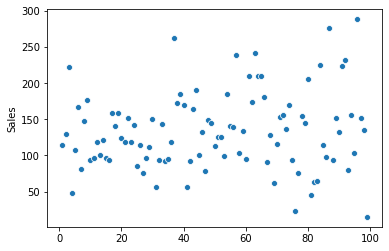

In [186]:
sns.scatterplot(np.arange(1,100,1),y_test[1:100] )

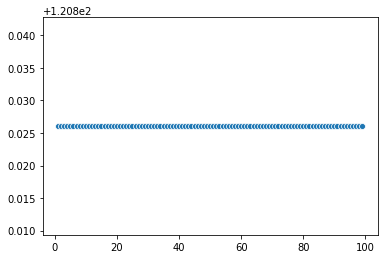

In [187]:
sns.scatterplot(np.arange(1,100,1),y_pred[1:100])

In [202]:
#One hot encode
encoded_col = ['Course_Domain', 'Course_Type']

In [204]:
train = pd.get_dummies(train,columns = encoded_col)

In [220]:
train.columns

Index(['ID', 'Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Sales',
       'Course_Domain_Business', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program'],
      dtype='object')

In [258]:
col = ['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric',
       'Course_Domain_Business', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program']

In [259]:
X = train[col]

In [260]:
y = train['Sales']

In [261]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [104]:
# Linear Regression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
metrics.r2_score(y_test,y_pred_lr)

0.20218769150806193

In [105]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
metrics.r2_score(y_test,y_pred_rf)

0.781689565322042

In [106]:
from xgboost import XGBRegressor

In [299]:
model_xg = XGBRegressor()
model_xg.fit(X_train,y_train)
y_pred_xg = model_xg.predict(X_test)

0.8398449660984799

In [319]:
metrics.r2_score(y_test, y_pred_xg)

0.8398449660984799

In [305]:
sub_encode_col = ['Course_Domain','Course_Type']

In [306]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [307]:
test = pd.get_dummies(test,columns = sub_encode_col)

In [119]:
test.drop('ID', axis= 1, inplace = True)

In [120]:
test['Competition_Metric'].fillna(test['Competition_Metric'].mean(),inplace = True)

In [117]:
test = pd.get_dummies(test,columns = encoded_col)

In [121]:
sub_y_pred_lr = model_lr.predict(test)
sub_y_pred_rf = model_rf.predict(test)
sub_y_pred_xg = model_xg.predict(test)

In [122]:
submission_lr = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_lr))
submission_rf = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_rf))
submission_xg = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_xg))

NameError: name 'submission_id' is not defined

In [ ]:
submission_lr = submission_lr.rename(columns={'ID':'ID',0:'Sales'})
submission_rf = submission_rf.rename(columns={'ID':'ID',0:'Sales'})
submission_xg = submission_xg.rename(columns={'ID':'ID',0:'Sales'})

In [299]:
model_xg = XGBRegressor()
model_xg.fit(X_train,y_train)
y_pred_xg = model_xg.predict(X_test)

0.8398449660984799

In [319]:
metrics.r2_score(y_test, y_pred_xg)

0.8398449660984799

In [305]:
sub_encode_col = ['Course_Domain','Course_Type']

In [306]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [307]:
test = pd.get_dummies(test,columns = sub_encode_col)

In [308]:
test.drop('ID', axis= 1, inplace = True)

In [313]:
test['Competition_Metric'].fillna(test['Competition_Metric'].mean(),inplace = True)

In [314]:
test.columns

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric', 'Course_Domain_Business',
       'Course_Domain_Development', 'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program'],
      dtype='object')

In [315]:
sub_y_pred_lr = model_lr.predict(test)
sub_y_pred_rf = model_rf.predict(test)
sub_y_pred_xg = model_xg.predict(test)

In [316]:
submission_lr = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_lr))
submission_rf = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_rf))
submission_xg = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_xg))

In [317]:
submission_lr = submission_lr.rename(columns={'ID':'ID',0:'Sales'})
submission_rf = submission_rf.rename(columns={'ID':'ID',0:'Sales'})
submission_xg = submission_xg.rename(columns={'ID':'ID',0:'Sales'})

<img src = 'Capture.JPG'>

In [320]:
np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_lr))

0.4129506481664668

In [321]:
np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_rf))

0.23561319904187655

# Improving the model

In [32]:
train.drop('User_Traffic', axis = 1, inplace = True)

In [66]:
traintest = pd.concat([train, test], axis =  0)

In [67]:
traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548087 entries, 0 to 35999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  548087 non-null  int64  
 1   Day_No              548087 non-null  int64  
 2   Course_ID           548087 non-null  int64  
 3   Course_Domain       548087 non-null  object 
 4   Course_Type         548087 non-null  object 
 5   Short_Promotion     548087 non-null  int64  
 6   Public_Holiday      548087 non-null  int64  
 7   Long_Promotion      548087 non-null  int64  
 8   Competition_Metric  547967 non-null  float64
 9   Sales               512087 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 46.0+ MB


In [68]:
traintest['Competition_Metric'].fillna(traintest['Competition_Metric'].mean(), inplace = True)

In [69]:
traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548087 entries, 0 to 35999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  548087 non-null  int64  
 1   Day_No              548087 non-null  int64  
 2   Course_ID           548087 non-null  int64  
 3   Course_Domain       548087 non-null  object 
 4   Course_Type         548087 non-null  object 
 5   Short_Promotion     548087 non-null  int64  
 6   Public_Holiday      548087 non-null  int64  
 7   Long_Promotion      548087 non-null  int64  
 8   Competition_Metric  548087 non-null  float64
 9   Sales               512087 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 46.0+ MB


In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
#One hot encode
encoded_col = ['Course_Domain', 'Course_Type']

In [43]:
traintest = pd.get_dummies(traintest, columns = encoded_col)

In [48]:
traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548087 entries, 0 to 35999
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ID                                  548087 non-null  int64  
 1   Day_No                              548087 non-null  int64  
 2   Course_ID                           548087 non-null  int64  
 3   Short_Promotion                     548087 non-null  int64  
 4   Public_Holiday                      548087 non-null  int64  
 5   Long_Promotion                      548087 non-null  int64  
 6   Competition_Metric                  548087 non-null  float64
 7   Sales                               512087 non-null  float64
 8   Course_Domain_Business              548087 non-null  uint8  
 9   Course_Domain_Development           548087 non-null  uint8  
 10  Course_Domain_Finance & Accounting  548087 non-null  uint8  
 11  Course_Domain_Software Mark

In [49]:
traintest.columns

Index(['ID', 'Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric', 'Sales',
       'Course_Domain_Business', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program'],
      dtype='object')

In [52]:
scaler = StandardScaler()
a = pd.DataFrame(scaler.fit_transform(traintest[[ 'Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric',
       'Course_Domain_Business', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program']]), columns = [ 'Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric', 
       'Course_Domain_Business', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program'])

In [70]:
traintest['ID']

0             1
1             2
2             3
3             4
4             5
          ...  
35995    548083
35996    548084
35997    548085
35998    548086
35999    548087
Name: ID, Length: 548087, dtype: int64

In [76]:
train['Competition_Metric'].fillna(train['Competition_Metric'].mean(),inplace = True)

In [78]:
train.drop('User_Traffic', axis = 1, inplace = True)

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   Competition_Metric  512087 non-null  float64
 9   Sales               512087 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 39.1+ MB


In [144]:
train = pd.get_dummies(train,columns = encoded_col)

In [82]:
train.columns

Index(['ID', 'Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric', 'Sales',
       'Course_Domain_Business', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program'],
      dtype='object')

In [92]:
train_scaled = pd.DataFrame(scaler.fit_transform(train[['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric', 
       'Course_Domain_Business', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program']]), columns = col)

In [93]:
col=['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',  'Long_Promotion', 'Competition_Metric','Course_Domain_Business', 'Course_Domain_Development','Course_Domain_Finance & Accounting','Course_Domain_Software Marketing', 'Course_Type_Course', 'Course_Type_Degree', 'Course_Type_Program']

In [96]:
train_scaled_new = pd.concat([train_scaled,train[['ID','Sales']]], axis = 1)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X = train_scaled
y = train['Sales']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [297]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
metrics.r2_score(y_test,y_pred_lr)

0.20218926164582163

In [298]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
metrics.r2_score(y_test,y_pred_rf)

0.7809455323936677

In [238]:
from xgboost import XGBRegressor

In [297]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
metrics.r2_score(y_test,y_pred_lr)

0.20218926164582163

In [298]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
metrics.r2_score(y_test,y_pred_rf)

0.7809455323936677

In [238]:
from xgboost import XGBRegressor

In [111]:
model_xg = XGBRegressor()
model_xg.fit(X_train,y_train)
y_pred_xg = model_xg.predict(X_test)

In [112]:
metrics.r2_score(y_test, y_pred_xg)

0.8398287127914391

In [113]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [114]:
test = pd.get_dummies(test,columns = sub_encode_col)

NameError: name 'sub_encode_col' is not defined

In [ ]:
test.drop('ID', axis= 1, inplace = True)

In [ ]:
test['Competition_Metric'].fillna(test['Competition_Metric'].mean(),inplace = True)

In [ ]:
test.columns

In [ ]:
sub_y_pred_lr = model_lr.predict(test)
sub_y_pred_rf = model_rf.predict(test)
sub_y_pred_xg = model_xg.predict(test)

In [ ]:
submission_lr = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_lr))
submission_rf = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_rf))
submission_xg = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_xg))

In [ ]:
submission_lr = submission_lr.rename(columns={'ID':'ID',0:'Sales'})
submission_rf = submission_rf.rename(columns={'ID':'ID',0:'Sales'})
submission_xg = submission_xg.rename(columns={'ID':'ID',0:'Sales'})

In [319]:
metrics.r2_score(y_test, y_pred_xg)

0.8398449660984799

In [305]:
sub_encode_col = ['Course_Domain','Course_Type']

In [306]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [131]:
test = pd.get_dummies(test,columns = encoded_col)

In [127]:
test.drop('ID', axis= 1, inplace = True)

In [128]:
test['Competition_Metric'].fillna(test['Competition_Metric'].mean(),inplace = True)

In [132]:
test.columns

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric', 'Course_Domain_Business',
       'Course_Domain_Development', 'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program'],
      dtype='object')

In [135]:
X_train.columns

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric', 'Course_Domain_Business',
       'Course_Domain_Development', 'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Course',
       'Course_Type_Degree', 'Course_Type_Program'],
      dtype='object')

In [136]:
sub_y_pred_lr = model_lr.predict(test)
sub_y_pred_rf = model_rf.predict(test)
sub_y_pred_xg = model_xg.predict(test)

In [139]:
submission_lr = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_lr))
submission_rf = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_rf))
submission_xg = pd.DataFrame(submission_id).join(pd.DataFrame(sub_y_pred_xg))

In [140]:
submission_lr = submission_lr.rename(columns={'ID':'ID',0:'Sales'})
submission_rf = submission_rf.rename(columns={'ID':'ID',0:'Sales'})
submission_xg = submission_xg.rename(columns={'ID':'ID',0:'Sales'})

In [142]:
submission_lr.to_csv('submission_lr_2.csv')

In [143]:
submission_rf.to_csv('submission_rf_2.csv')
submission_xg.to_csv('submission_xg_2.csv')